In [2]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

import os
import pdb
import sys
import json
# import re
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from pathlib import Path
import dotenv
import json
dotenv.load_dotenv()
p_code = Path(os.environ.get("HOME_DIR"))
p_data = Path(os.environ.get("DATA_DIR"))

net = 'stepnet'
PATH_YANGNET = os.path.join(p_code,net) 
sys.path.insert(0, PATH_YANGNET)

from task import rules_dict
from network import Model
import tools
from tools_lnd import make_FP_axs, gen_D_fp_qr, gen_mov_trial_set

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
# ##################################################################
# #fig save path
# ##################################################################
fig_name = 'suppfig3'

epoch_set_master = ['stim1','stim1']
figpath = os.path.join(p_code,'figs',fig_name,fig_name+'_DFHJL')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [9]:
# ##################################################################
# #Find right model dir
# ##################################################################
data_fldr = 'suppfig3'
m = os.path.join(p_data,data_fldr)

In [11]:
model = Model(m)
with tf.Session() as sess:
    model.restore()
    model._sigma=0
    var_list = model.var_list
    params = [sess.run(var) for var in var_list]
    hparams = model.hp

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Instructions for updating:
Call initializer instance with the dtype argument instea

/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
2024-04-08 12:33:31.602398: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt


/var/folders/_8/556chyfx1hvd7cyh7d14w3dh0000gn/T/ipykernel_77366/984896892.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greys')


<Figure size 1000x500 with 0 Axes>

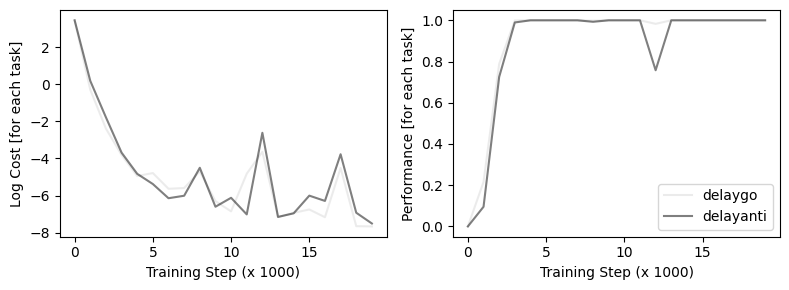

In [12]:
fig = plt.figure(figsize=(10, 5))
fname = os.path.join(m, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Define a colormap
cmap = plt.cm.get_cmap('Greys')

# Plot cost and performance for each rule
for i, rule in enumerate(rule_trains):
    color = cmap(i+1 / (len(rule_trains) + 2))  # Normalize color index

    ax1.plot(np.log(log_all['cost_'+rule]), '-', color=color, alpha=0.5, label=rule)
    ax2.plot(log_all['perf_'+rule], '-', color=color, alpha=0.5, label=rule)

# Set axis labels and title
ax1.set_xlabel('Training Step (x 1000)')
ax1.set_ylabel('Log Cost [for each task]')
ax2.set_xlabel('Training Step (x 1000)')
ax2.set_ylabel('Performance [for each task]')
# fig.suptitle(file)  # Set a common title for both subplots


# Add legend
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from tools_lnd import interp3d,take_names, find_fp_dst_subspaces, plot_var_in

interp = True
fig_size = 6
linestyle = ['-','-']
tol_q = 1e-6
interp = True
trial_num = [0,0]
t_set = [0,0]

axs = 'pca_h'

rule_set = [2,5]
rule_str = [rules_dict['all'][rule_set[0]],rules_dict['all'][rule_set[1]]]
rule_axs = 1
trial_set = gen_mov_trial_set(m,rule_set)
D_fp_qr = gen_D_fp_qr(m,trial_set,rule_axs, ['fix1','fix1'],trial_num)

rule = rules_dict['all'][rule_set[rule_axs]]
D_stim = make_FP_axs(' ', m, rule, epoch_set_master[0], axs = axs)

D_use = -D_stim
D_use[:,2] = D_fp_qr[:,0]

epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set_master[0],rules_dict['all'][rule_set[rule_axs]])
ax_labels = [r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC1',
             r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC2',
             r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC3']

script_name = 'interp_tasks_small_init_stim'
epoch_set = ['stim1','stim1']
q_thresh = .000001

# interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
#          interp = interp,q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True,
#          n_skip_interps=1,lil_axes =False,color_stim = True,fig_size = fig_size,fontsize = 16,
#          figpath = figpath,ruleset = ruleset,alpha_fp = .6,plot_zero_plane = False,
#          ax_labels = ax_labels, stability_thresh = 1, z_label = 'Context Endpt. Diff',view_ang = [30, -80])

# _, _, _,f = find_fp_dst_subspaces(m, D_use, trial_set, epoch_set, rule_set, trial_num, q_thresh = q_thresh, 
#                       script_name = script_name,figpath = figpath)
# plot_var_in(m,D_use,rule_str,epoch_set,figpath,script_name,rule_axs,axs = axs)


script_name = 'interp_tasks_small_init_mov'
epoch_set = ['fix1','fix1']
q_thresh = .00001

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
         interp = interp,q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True,
         n_skip_interps=1,lil_axes =False,color_stim = True,fig_size = fig_size,fontsize = 16,
         figpath = figpath,ruleset = ruleset,alpha_fp = .4,plot_zero_plane = False,n_trials = 8,
         ax_labels = ax_labels, stability_thresh = 1.05, z_label = 'Context Endpt. Diff', view_ang = [30, -80])

# _, _, _,f = find_fp_dst_subspaces(m, D_use, trial_set, epoch_set, rule_set, trial_num, q_thresh = q_thresh, 
#                       script_name = script_name,figpath = figpath)
# plot_var_in(m,D_use,rule_str,epoch_set,figpath,script_name,rule_axs,axs = axs)

epoch_set = ['delay1','delay1']
# D_use = make_FP_axs(' ', m, rule, epoch_set[0], axs = axs)
D_use[:,2] = w_out[:,2]
q_thresh = .000001

# epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[0],rules_dict['all'][rule_set[rule_axs]])
# ax_labels = [epoch_name_ax+' State PC1',
#              epoch_name_ax+' State PC2',
#              epoch_name_ax+' State PC3']

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
         interp = interp,q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True, view_ang = [30, -80],
         n_skip_interps=1,lil_axes =False,color_stim = True,fig_size = fig_size,fontsize = 16,
         figpath = figpath,ruleset = ruleset,alpha_fp = .1,ax_labels = ax_labels, stability_thresh = 1.05)

# _, _, _,f = find_fp_dst_subspaces(m, D_use, trial_set, epoch_set, rule_set, trial_num, q_thresh = q_thresh, 
#                       script_name = script_name,figpath = figpath)
# plot_var_in(m,D_use,rule_str,epoch_set,figpath,script_name,rule_axs,axs = axs)


epoch_set = ['go1','go1']
# D_use = make_FP_axs(' ', m, rule, epoch_set[0], axs = axs)
# D_use[:,1] = -D_use[:,1]
D_use[:,2] = w_out[:,2]
q_thresh = .000001

# epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[0],rules_dict['all'][rule_set[rule_axs]])
# ax_labels = [epoch_name_ax+' State PC1',
#              epoch_name_ax+' State PC2',
#              epoch_name_ax+' State PC3']

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
         interp = interp,q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True, view_ang = [30, -80],
         n_skip_interps=1,lil_axes =False,color_stim = True,fig_size = fig_size,fontsize = 16,
         figpath = figpath,ruleset = ruleset,alpha_fp = .1,ax_labels = ax_labels, stability_thresh = 2)

# _, _, _,f = find_fp_dst_subspaces(m, D_use, trial_set, epoch_set, rule_set, trial_num, q_thresh = q_thresh, 
#                       script_name = script_name,figpath = figpath)
# plot_var_in(m,D_use,rule_str,epoch_set,figpath,script_name,rule_axs,axs = axs)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1044, 1024) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(1024, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/1024_n_rnn/lr7.0l2_w6.0_h6.0_sig_rec0.0_sig_x0.0_w_rec_coeff_0.8_delaygo_delayanti/3/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/mem_motifs_small/LeakyRNN/softplus/diag/2_tasks/1024_n_rnn/lr7.0l2_w6.0_h6.0_sig_rec0.0_sig_x0.0_w_rec_coeff_0.8_delaygo_delayanti/3/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1044, 1024) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'output/w

In [ ]:
# from tools_lnd import make_D_use, interp3d,take_names

# interp = True
# fig_size = 5
# linestyle = ['-','-']
# tol_q = 1e-6
# interp = True
# trial_num = [0,0]
# t_set = [0,0]

# axs = 'pca_h'

# rule_set = [2,5]
# rule_str = [rules_dict['all'][rule_set[0]],rules_dict['all'][rule_set[1]]]
# rule_axs = 1
# trial_set = gen_mov_trial_set(m,rule_set)
# D_fp_qr = gen_D_fp_qr(m,trial_set,rule_axs, ['fix1','fix1'],trial_num)

# epoch_set = ['stim1','stim1']
# rule = rules_dict['all'][rule_set[rule_axs]]
# D_stim = make_FP_axs(' ', m, rule, epoch_set[0], axs = axs)

# D_use = D_stim
# D_use[:,2] = D_fp_qr[:,0]

# epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[0],rules_dict['all'][rule_set[rule_axs]])
# ax_labels = [r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC1',
#              r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC2',
#              r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC3']

# script_name = 'interp_tasks_small_init_stim'
# epoch_set = ['stim1','stim1']

# interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
#          interp = interp,q_thresh = .000001,rule_axs = rule_axs, plot_unstable = True,
#          n_skip_interps=1,lil_axes =False,color_stim = True,fig_size = fig_size,fontsize = 16,
#          figpath = figpath,ruleset = ruleset,alpha_fp = .6,plot_zero_plane = False, 
#          ax_labels = ax_labels, stability_thresh = 1, z_label = 'Context Endpt. Diff',view_ang = [10, 30])


# script_name = 'interp_tasks_small_init_mov'
# epoch_set = ['fix1','fix1']

# interp3d(m,D_use,rule_set,['fix1','fix1'],t_set,script_name = script_name,tol_q = tol_q,
#          interp = interp,q_thresh = .000001,rule_axs = rule_axs, plot_unstable = True,
#          n_skip_interps=1,lil_axes =False,color_stim = True,fig_size = fig_size,fontsize = 16,
#          figpath = figpath,ruleset = ruleset,alpha_fp = .1,plot_zero_plane = False,n_trials = 8,
#          ax_labels = ax_labels, stability_thresh = 1.05, z_label = 'Context Endpt. Diff',view_ang = [10, 30])

# epoch_set = ['delay1','delay1']
# # D_use = make_FP_axs(' ', m, rule, epoch_set[0], axs = axs)
# D_use[:,2] = w_out[:,2]

# # epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[0],rules_dict['all'][rule_set[rule_axs]])
# # ax_labels = [epoch_name_ax+' State PC1',
# #              epoch_name_ax+' State PC2',
# #              epoch_name_ax+' State PC3']

# interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
#          interp = interp,q_thresh = .000001,rule_axs = rule_axs, plot_unstable = True, view_ang = [30, 30],
#          n_skip_interps=1,lil_axes =False,color_stim = True,fig_size = fig_size,fontsize = 16,
#          figpath = figpath,ruleset = ruleset,alpha_fp = .1,ax_labels = ax_labels, stability_thresh = 1.05)


# epoch_set = ['go1','go1']
# # D_use = make_FP_axs(' ', m, rule, epoch_set[0], axs = axs)
# # D_use[:,1] = -D_use[:,1]
# D_use[:,2] = w_out[:,2]

# # epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[0],rules_dict['all'][rule_set[rule_axs]])
# # ax_labels = [epoch_name_ax+' State PC1',
# #              epoch_name_ax+' State PC2',
# #              epoch_name_ax+' State PC3']

# interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
#          interp = interp,q_thresh = .000001,rule_axs = rule_axs, plot_unstable = True, view_ang = [10, 30],
#          n_skip_interps=1,lil_axes =False,color_stim = True,fig_size = fig_size,fontsize = 16,
#          figpath = figpath,ruleset = ruleset,alpha_fp = .1,ax_labels = ax_labels, stability_thresh = 2)

In [17]:
from tools_lnd import var_x_epoch
var_test_sort, tick_labels, keys = var_x_epoch(m, n_components = 100, timing_sort=True)

tick_labels = ['Pro Context',
 'Anti Context',
 'Pro Stim',
 'Anti Stim',
 'Pro Memory',
 'Anti Memory',
 'Pro Response',
 'Anti Response']

n_dims = 2
fig = plt.figure(figsize=(4.5,2.7),tight_layout=True,facecolor='white')
ax = plt.subplot(111)

plt.imshow(np.sum(var_test_sort[:,:,:n_dims],axis = 2),cmap = 'cividis')

ax.set_xlabel('Fit', fontsize = 16)
ax.set_ylabel('Test', fontsize = 16)

ax.set_xticks([])
plt.title('Fraction var. in first '+ str(n_dims) + ' dimensions', fontsize = 16)
c = plt.colorbar()
c.outline.set_visible(False)

plt.clim(0, 1) 
ax.set_yticks(range(len(keys)))
ax.set_yticklabels(tick_labels, fontsize = 14)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig(os.path.join(figpath,'var_test_sort_random'+'.pdf'),bbox_inches='tight')
plt.show()

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt


ValueError: array must not contain infs or NaNs

In [26]:
keys = list(h_all_byepoch_fit.keys())
keys

[('delaygo', 'fix1'),
 ('delaygo', 'stim1'),
 ('delaygo', 'delay1'),
 ('delaygo', 'go1'),
 ('delayanti', 'fix1'),
 ('delayanti', 'stim1'),
 ('delayanti', 'delay1'),
 ('delayanti', 'go1')]

In [28]:
np.shape(h_all_byepoch_fit['delaygo', 'fix1'])

(20, 1024, 1024)

In [29]:
from tools_lnd import make_h_all
from sklearn.decomposition import PCA
n_components = 15
# Get relevant data for epochs
h_all_byepoch_fit, _, _, _, _, _ = make_h_all(m, mode='random', rules=[])
h_all_byepoch_test, _, _, h_all_timing, _, _ = make_h_all(m, mode='random', rules=[])

# Extract keys and initialize arrays for storing variance
keys = list(h_all_byepoch_fit.keys())
var_test = np.empty((len(keys), len(keys), n_components))
var_test_sort = np.empty((len(keys), len(keys), n_components))

# Iterate through epochs to calculate variance
for key_i, key in enumerate(keys):
    h_tf = h_all_byepoch_fit[key]

    # Reshape and transpose data for PCA
    x = np.transpose(h_tf, (2, 1, 0))
    X = np.reshape(x, (x.shape[0], -1))

    # Perform PCA and fit model
    pca = PCA(n_components=n_components)
    _ = pca.fit_transform(X.T)  # Fit PCA model

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/suppfig3/model.ckpt


In [15]:
n_dims = 5
fig = plt.figure(figsize=(4.2,2.8),tight_layout=True,facecolor='white')
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
cmap = ['k','k','orange','orange','dodgerblue','dodgerblue','mediumseagreen','mediumseagreen']

for x in range(0,len(var_test_sort),2):
    ax1.plot(np.cumsum(var_test_sort[x,x,:]),'.-',c = cmap[x],alpha = .6,linewidth = 2,markersize = 13)
    
ax1.set_title('MemoryPro', fontsize = 16)      
ax1.set_xlabel('N PCs', fontsize = 16)
ax1.set_ylabel('Var Expl.', fontsize = 16)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_xlim([-1,14.5])
ax1.set_ylim([-.1,1.1])
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

    
for x in range(1,len(var_test_sort),2):
    ax2.plot(np.cumsum(var_test_sort[x,x,:]),'.-',label = tick_labels[x][4:],
             c = cmap[x],alpha = .6,linewidth = 2,markersize = 13)
    
ax2.set_title('MemoryAnti', fontsize = 16)   
ax2.set_xlabel('N PCs', fontsize = 16)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_yticks([])

ax2.set_xlim([-1,14.5])
ax2.set_ylim([-.1,1.1])
plt.legend(bbox_to_anchor=(.35, 0.75), fontsize = 12)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

plt.savefig(os.path.join(figpath,'var_skree_random'+'.pdf'),bbox_inches='tight')
plt.show()

ImportError: cannot import name 'var_test_sort' from 'tools_lnd' (/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py)